# Exploratory Data Analysis (EDA)

In [1]:
import os
while os.getcwd().endswith('/notebooks'):
    os.chdir('..')

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from src.preprocessing import preprocess
from statsmodels.tsa.stattools import adfuller
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [4]:
data_path = 'data/base_estudo.csv'
cfg_path = 'cfg.yaml'
df = pd.read_csv(data_path, index_col=0)
df = preprocess(df, cfg_path)

In [5]:
df

n_pedidos
data       id_produto           
2022-07-01 15474-0           0.0
           15475-0           0.0
           15475-3        1656.0
           15476-0           0.0
           15476-3         720.0
...                          ...
2024-12-30 27525-0           0.0
           28038-0           0.0
           28039-0           0.0
           28344-0          96.0
           28438-0           0.0

[130637 rows x 1 columns]

In [6]:
corr_df = df['n_pedidos'].unstack('id_produto').corr()
corr_df

id_produto,15474-0,15475-0,15475-3,15476-0,15476-3,15477-0,15478-0,15479-0,15479-3,15480-0,...,27245-0,27246-0,27396-0,27398-0,27524-0,27525-0,28038-0,28039-0,28344-0,28438-0
id_produto,,,,,,,,,,,,,,,,,,,,,
15474-0,1.000000,0.000601,0.009674,0.000541,0.006100,0.010962,-0.001927,0.001470,0.001135,-0.001226,...,-0.015455,-0.012266,-0.006688,-0.010927,-0.010730,-0.010589,-0.002727,-0.002584,-0.011228,-0.006397
15475-0,0.000601,1.000000,0.063502,0.982280,0.058902,-0.001278,0.000456,0.993528,0.077465,-0.001414,...,0.009867,0.008406,-0.006176,-0.010090,-0.009909,-0.009778,-0.002518,-0.002386,-0.010368,-0.005907
15475-3,0.009674,0.063502,1.000000,0.069448,0.889472,0.006084,-0.017230,0.058610,0.867591,0.005774,...,0.230450,0.181893,0.078938,0.275688,0.166595,0.152982,-0.003048,-0.006543,0.269098,0.020056
15476-0,0.000541,0.982280,0.069448,1.000000,0.065114,-0.000866,-0.000796,0.981277,0.081923,-0.000798,...,0.010357,0.008780,-0.005872,-0.009594,-0.009602,-0.009426,-0.002448,-0.002320,-0.008948,-0.005743
15476-3,0.006100,0.058902,0.889472,0.065114,1.000000,0.064414,-0.017587,0.052217,0.885240,-0.002799,...,0.215346,0.176928,0.073028,0.278867,0.182523,0.182097,0.015965,0.009476,0.269120,0.026684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27525-0,-0.010589,-0.009778,0.152982,-0.009426,0.182097,0.014466,-0.007117,-0.008256,0.138130,-0.012139,...,0.075100,0.160211,0.119199,0.175899,0.735861,1.000000,0.020998,0.016280,0.184553,0.054950
28038-0,-0.002727,-0.002518,-0.003048,-0.002448,0.015965,-0.002812,-0.001833,-0.002126,0.013121,-0.003127,...,-0.007281,-0.002654,0.049121,0.098813,0.002008,0.020998,1.000000,0.947587,0.220435,0.375465
28039-0,-0.002584,-0.002386,-0.006543,-0.002320,0.009476,-0.002665,-0.001737,-0.002015,0.009786,-0.002963,...,-0.005006,-0.002850,0.028843,0.089219,-0.001677,0.016280,0.947587,1.000000,0.176113,0.238958


In [7]:
corr_series = corr_df.where(np.tri(corr_df.shape[0], k=-1, dtype=bool)).stack().sort_values()
corr_series

id_produto  id_produto
26569-0     17328-5      -0.192892
26566-0     17283-5      -0.190364
2463-6      2463-5       -0.183406
26566-0     17328-5      -0.170031
26569-0     17283-5      -0.168305
                            ...   
2471-4      17292-0       1.000000
17290-1     17194-0       1.000000
            17289-0       1.000000
            17287-0       1.000000
2473-2      17998-0       1.000000
Length: 14196, dtype: float64

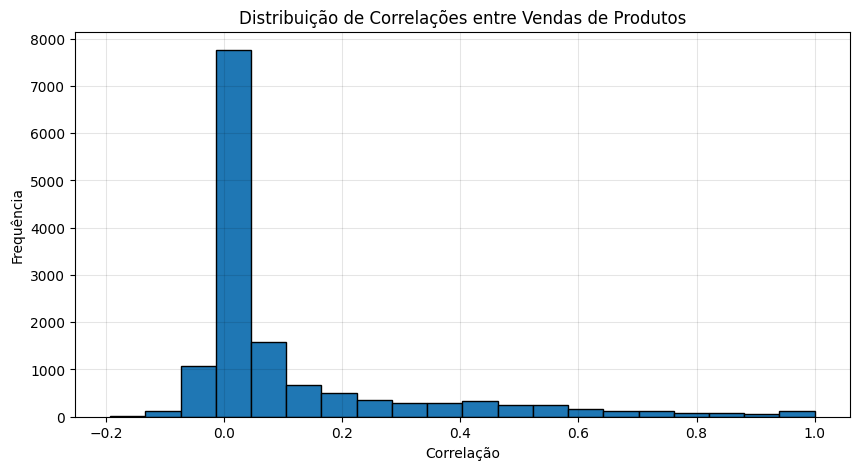

In [8]:
plt.figure(figsize=(10, 5))
corr_series.hist(bins=20, edgecolor='k')
plt.title('Distribuição de Correlações entre Vendas de Produtos')
plt.xlabel('Correlação')
plt.ylabel('Frequência')
plt.grid(c='k', alpha=0.1)
plt.show()

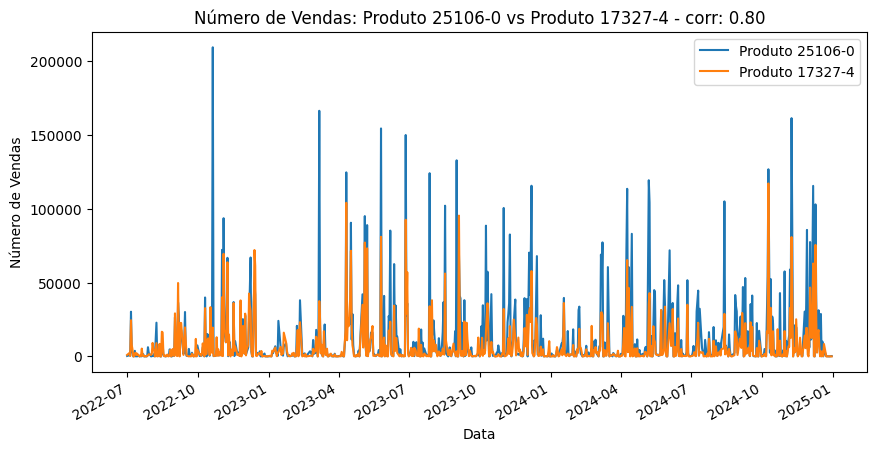

In [9]:
id_prod_1 = '25106-0'
id_prod_2 = '17327-4'
plt.figure(figsize=(10, 5))
df['n_pedidos'].xs(id_prod_1, level='id_produto').plot(label=f'Produto {id_prod_1}')
df['n_pedidos'].xs(id_prod_2, level='id_produto').plot(label=f'Produto {id_prod_2}')
plt.title(f'Número de Vendas: Produto {id_prod_1} vs Produto {id_prod_2} - corr: {corr_series[id_prod_1][id_prod_2]:.2f}')
plt.xlabel('Data')
plt.ylabel('Número de Vendas')
plt.legend()
plt.show()

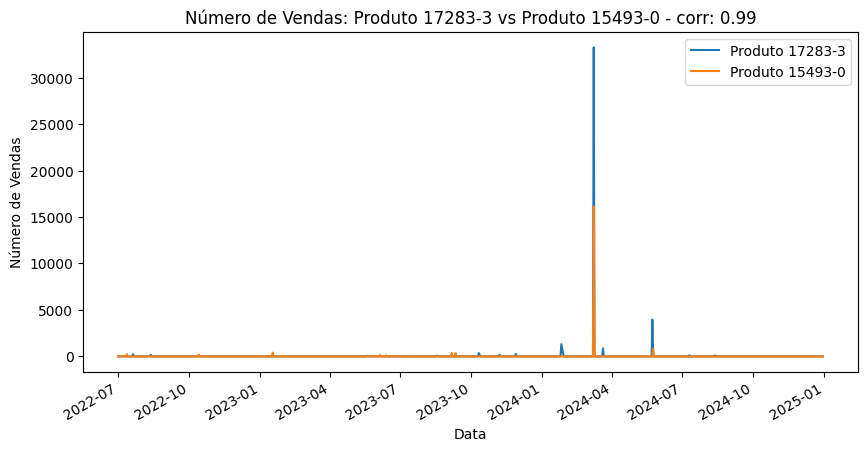

In [10]:
id_prod_1 = '17283-3'
id_prod_2 = '15493-0'
plt.figure(figsize=(10, 5))
df['n_pedidos'].xs(id_prod_1, level='id_produto').plot(label=f'Produto {id_prod_1}')
df['n_pedidos'].xs(id_prod_2, level='id_produto').plot(label=f'Produto {id_prod_2}')
plt.title(f'Número de Vendas: Produto {id_prod_1} vs Produto {id_prod_2} - corr: {corr_series[id_prod_1][id_prod_2]:.2f}')
plt.xlabel('Data')
plt.ylabel('Número de Vendas')
plt.legend()
plt.show()

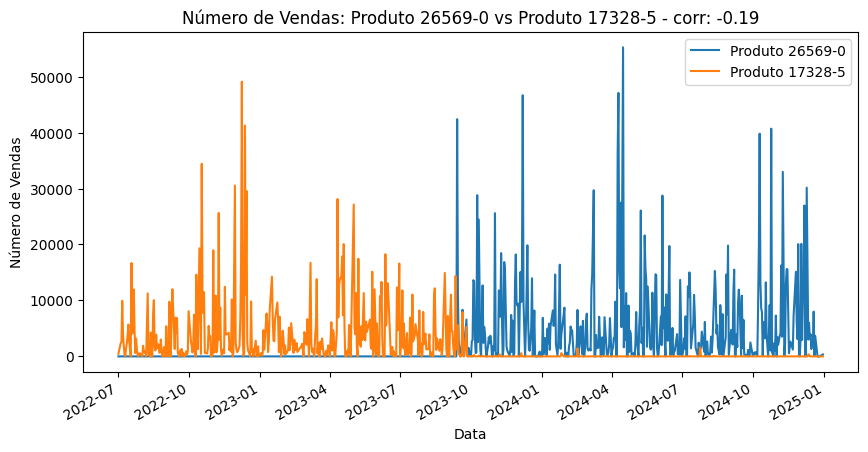

In [11]:
id_prod_1 = '26569-0'
id_prod_2 = '17328-5'
plt.figure(figsize=(10, 5))
df['n_pedidos'].xs(id_prod_1, level='id_produto').plot(label=f'Produto {id_prod_1}')
df['n_pedidos'].xs(id_prod_2, level='id_produto').plot(label=f'Produto {id_prod_2}')
plt.title(f'Número de Vendas: Produto {id_prod_1} vs Produto {id_prod_2} - corr: {corr_series[id_prod_1][id_prod_2]:.2f}')
plt.xlabel('Data')
plt.ylabel('Número de Vendas')
plt.legend()
plt.show()

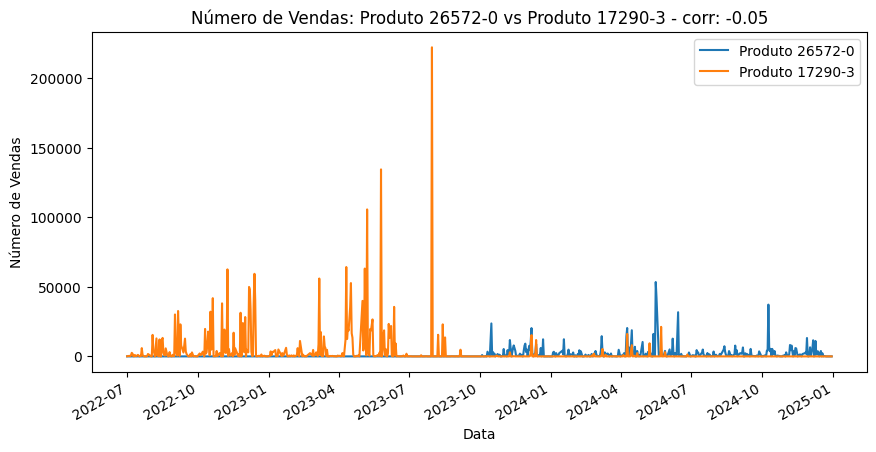

In [12]:
id_prod_1 = '26572-0'
id_prod_2 = '17290-3'
plt.figure(figsize=(10, 5))
df['n_pedidos'].xs(id_prod_1, level='id_produto').plot(label=f'Produto {id_prod_1}')
df['n_pedidos'].xs(id_prod_2, level='id_produto').plot(label=f'Produto {id_prod_2}')
plt.title(f'Número de Vendas: Produto {id_prod_1} vs Produto {id_prod_2} - corr: {corr_series[id_prod_1][id_prod_2]:.2f}')
plt.xlabel('Data')
plt.ylabel('Número de Vendas')
plt.legend()
plt.show()

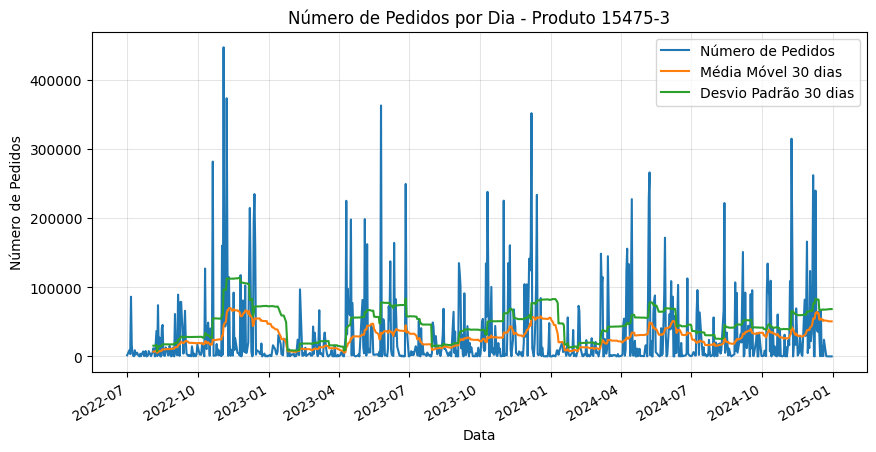

ADF Statistic: -7.601605961833774
P-Value: 2.381162588352753e-11
Time series is stationary.


In [13]:
id_produto = '15475-3'
_n_pedidos = (
    df.query('id_produto == @id_produto')
    .droplevel('id_produto')['n_pedidos']
)
plt.figure(figsize=(10, 5))
_n_pedidos.plot(label='Número de Pedidos')
_n_pedidos.rolling(30).mean().plot(label='Média Móvel 30 dias')
_n_pedidos.rolling(30).std().plot(label='Desvio Padrão 30 dias')
plt.legend()
plt.xlabel('Data')
plt.ylabel('Número de Pedidos')
plt.title(f'Número de Pedidos por Dia - Produto {id_produto}')
plt.grid(c='k', alpha=0.1)
plt.show()

result = adfuller(_n_pedidos)
print(f"ADF Statistic: {result[0]}")
print(f"P-Value: {result[1]}")
if result[1] > 0.05:
    print("Time series is non-stationary.")
else:
    print("Time series is stationary.")

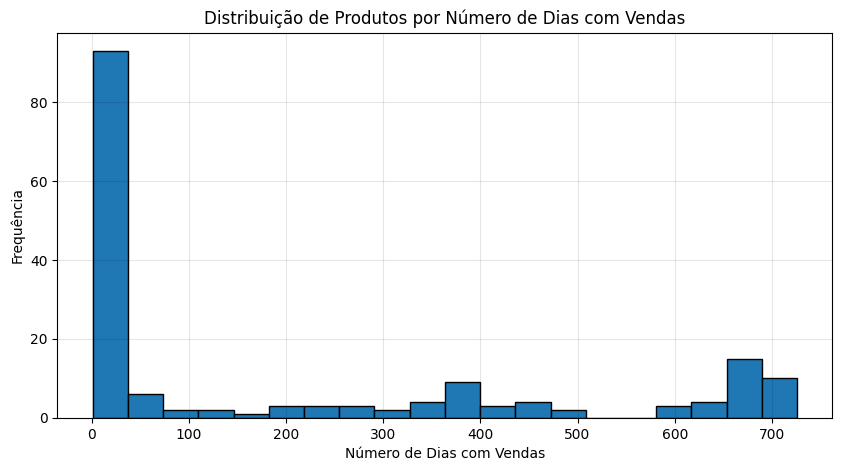

In [14]:
plt.figure(figsize=(10, 5))
df['n_pedidos'][df['n_pedidos'] != 0].reset_index().groupby('id_produto')['data'].count().sort_values().hist(bins=20, edgecolor='k')
plt.title('Distribuição de Produtos por Número de Dias com Vendas')
plt.xlabel('Número de Dias com Vendas')
plt.ylabel('Frequência')
plt.grid(c='k', alpha=0.1)
plt.show()

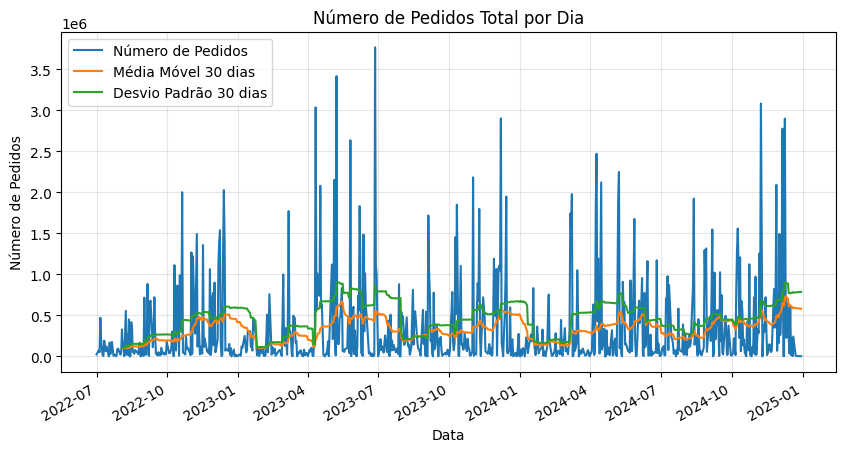

ADF Statistic: -8.120471094298326
P-Value: 1.1597655053627499e-12
Time series is stationary.


In [15]:
plt.figure(figsize=(10, 5))
_n_pedidos = df.groupby('data')['n_pedidos'].sum()
_n_pedidos.plot(label='Número de Pedidos')
_n_pedidos.rolling(30).mean().plot(label='Média Móvel 30 dias')
_n_pedidos.rolling(30).std().plot(label='Desvio Padrão 30 dias')
plt.title('Número de Pedidos Total por Dia')
plt.legend()
plt.xlabel('Data')
plt.ylabel('Número de Pedidos')
plt.grid(c='k', alpha=0.1)
plt.show()

result = adfuller(_n_pedidos)
print(f"ADF Statistic: {result[0]}")
print(f"P-Value: {result[1]}")
if result[1] > 0.05:
    print("Time series is non-stationary.")
else:
    print("Time series is stationary.")

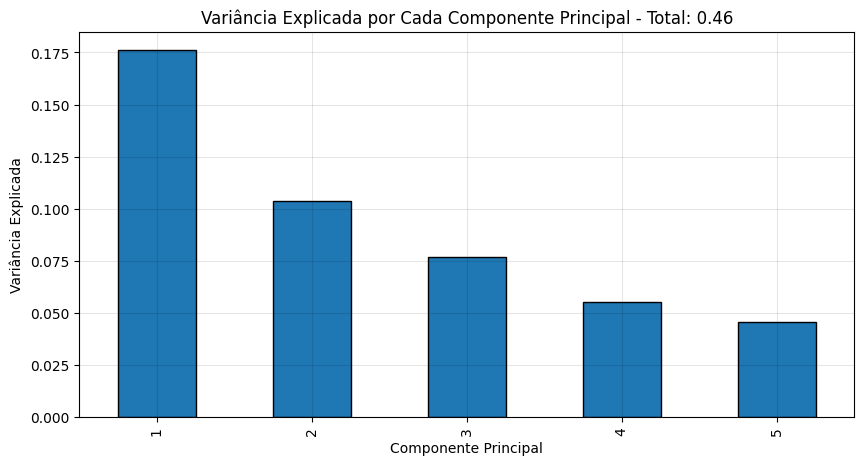

In [16]:
X = df['n_pedidos'].unstack('id_produto')

# Standardize the data (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
n_comp_pca = 5
pca = PCA(n_components=n_comp_pca)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 5))
pd.Series(pca.explained_variance_ratio_, index=range(1, n_comp_pca+1)).plot(kind='bar', edgecolor='k')
plt.title(f'Variância Explicada por Cada Componente Principal - Total: {pca.explained_variance_ratio_.sum():.2f}')
plt.xlabel('Componente Principal')
plt.ylabel('Variância Explicada')
plt.grid(c='k', alpha=0.1)
plt.show()

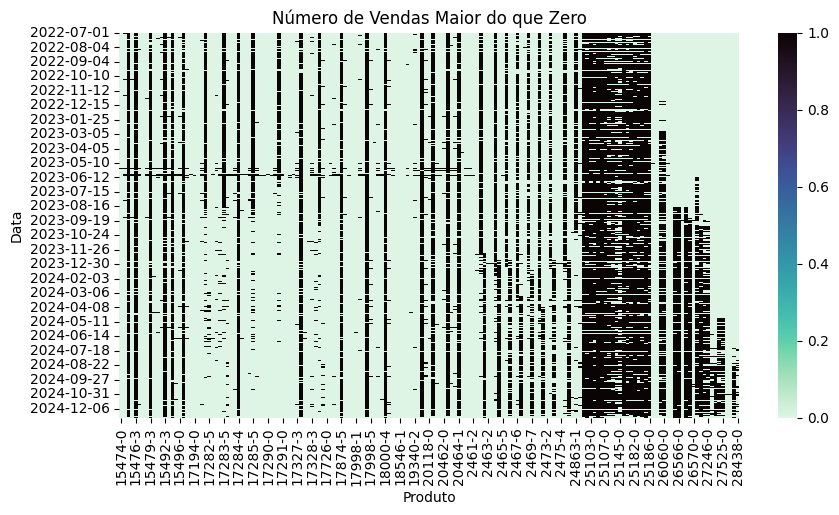

In [17]:
_df = df['n_pedidos'].unstack('id_produto').ne(0).copy()
_df.index = _df.index.date
plt.figure(figsize=(10, 5))
sns.heatmap(_df, cmap='mako_r')
plt.title('Número de Vendas Maior do que Zero')
plt.xlabel('Produto')
plt.ylabel('Data')
plt.show()